In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=np.genfromtxt('d1.csv',delimiter=',')

Datos: data 0:año 1:mes 2:dia 3:hora 4:minuto 5:v20 6:v10 7:Direccion del viento (0$^o$ es norte) 8: Presion (bar)

In [3]:
print(np.shape(data))

(4349, 9)


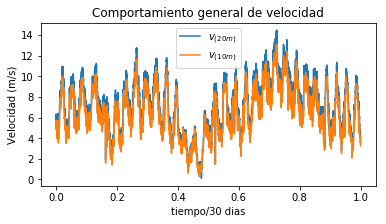

In [71]:
plt.figure(figsize=(6,3))
plt.plot(np.linspace(0,1,4349), data[:,5], label='$v_{(20m)}$')
plt.plot(np.linspace(0,1,4349), data[:,6], label='$v_{(10m)}$')
plt.ylabel('Velocidad (m/s)')
plt.xlabel('tiempo/30 dias')
plt.title("Comportamiento general de velocidad")
plt.legend()

In [5]:
dias=np.unique(data[:,2])
paramDia=np.zeros((np.shape(dias)[0],5))
for i in range(np.shape(dias)[0]):
    datos=data[data[:,2]==dias[i]]
    paramDia[i,:]=[dias[i],np.mean(datos[:,5]),np.std(datos[:,5]),np.mean(datos[:,6]),np.std(datos[:,6])]

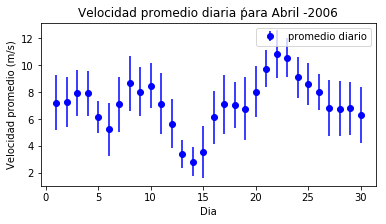

In [70]:
plt.figure(figsize=(6,3))
plt.title("Velocidad promedio diaria ṕara Abril -2006")
plt.errorbar(paramDia[:,0],paramDia[:,1],paramDia[:,2],linestyle='None', marker='o',label="promedio diario", color="b")
plt.ylabel('Velocidad promedio (m/s)')
plt.xlabel('Dia')
plt.legend()

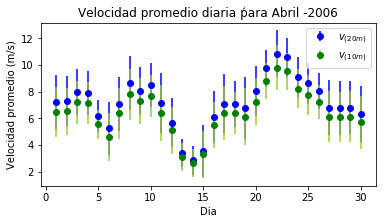

In [69]:
plt.figure(figsize=(6,3))
plt.title("Velocidad promedio diaria ṕara Abril -2006")
plt.errorbar(paramDia[:,0],paramDia[:,1],paramDia[:,2],linestyle='None', marker='o',label='$v_{(20m)}$', color="b")
plt.errorbar(paramDia[:,0],paramDia[:,3],paramDia[:,4],linestyle='None', marker='o',label='$v_{(10m)}$', color="g", ecolor="yellowgreen")
plt.ylabel('Velocidad promedio (m/s)')
plt.xlabel('Dia')
plt.legend()

In [8]:
diaMax=paramDia[paramDia[:,1]==np.max(paramDia[:,1])]
diaMin=paramDia[paramDia[:,1]==np.min(paramDia[:,1])]

In [9]:
print(diaMax[0,0])
print(diaMin[0,0])

22.0
14.0


In [29]:
dMax=data[data[:,2]==diaMax[0,0]]
dMin=data[data[:,2]==diaMin[0,0]]

In [30]:
tMax=dMax[:,3]*60+dMax[:,4]
tMin=dMin[:,3]*60+dMin[:,4]

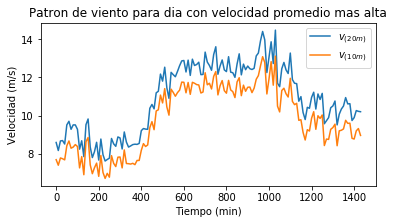

In [94]:
plt.figure(figsize=(6,3))
plt.plot(tMax, dMax[:,5], label='$v_{(20m)}$')
plt.plot(tMax, dMax[:,6], label='$v_{(10m)}$')
plt.ylabel('Velocidad (m/s)')
plt.xlabel('Tiempo (min)')
plt.title("Patron de viento para dia con velocidad promedio mas alta")
plt.legend()

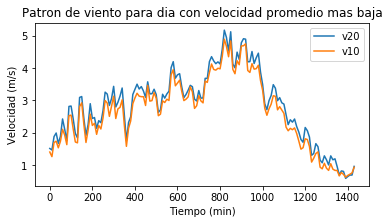

In [95]:
plt.figure(figsize=(6,3))
plt.plot(tMin, dMin[:,5], label='v20')
plt.plot(tMin, dMin[:,6], label='v10')
plt.ylabel('Velocidad (m/s)')
plt.xlabel('Tiempo (min)')
plt.title("Patron de viento para dia con velocidad promedio mas baja")
plt.legend()

In [78]:
np.min(np.abs(paramDia[:,1]-np.mean(data[:,5])))

0.00420093220663631

In [79]:
np.abs(paramDia[:,1]-np.mean(data[:,5]))

array([4.20093221e-03, 6.39300989e-02, 7.60270377e-01, 6.90607182e-01,
       1.02984073e+00, 1.97095879e+00, 1.25410179e-01, 1.44392315e+00,
       8.36124543e-01, 1.26715232e+00, 6.31393456e-02, 1.54342407e+00,
       3.81117823e+00, 4.37393796e+00, 3.65906990e+00, 1.09127823e+00,
       1.25056012e-01, 1.44972679e-01, 4.34986568e-01, 8.28249543e-01,
       2.54556899e+00, 3.63337305e+00, 3.35922177e+00, 1.88135371e+00,
       1.40030510e+00, 8.23624543e-01, 4.05347679e-01, 4.31382401e-01,
       4.18417123e-01, 9.01062957e-01])

In [80]:
paramDia[:,1]

array([ 7.21727083,  7.277     ,  7.97334028,  7.90367708,  6.18322917,
        5.24211111,  7.08765972,  8.65699306,  8.04919444,  8.48022222,
        7.14993056,  5.66964583,  3.40189167,  2.83913194,  3.554     ,
        6.12179167,  7.08801389,  7.06809722,  6.77808333,  8.04131944,
        9.75863889, 10.84644295, 10.57229167,  9.09442361,  8.613375  ,
        8.03669444,  6.80772222,  6.7816875 ,  6.79465278,  6.31200694])

In [81]:
np.mean(data[:,5])

7.213069901126696

In [82]:
data=np.genfromtxt('d1.csv',delimiter=',')
alpha=np.log(data[:,5]/data[:,6])/np.log(2)

In [83]:
dataAl=np.copy(data)
dataAl[:,8]=alpha

In [84]:
dias=np.unique(dataAl[:,2])
paramAl=np.zeros((np.shape(dias)[0],3))
for i in range(np.shape(dias)[0]):
    datos=dataAl[dataAl[:,2]==dias[i]]
    paramAl[i,:]=[dias[i],np.mean(datos[:,8]),np.std(datos[:,8])]

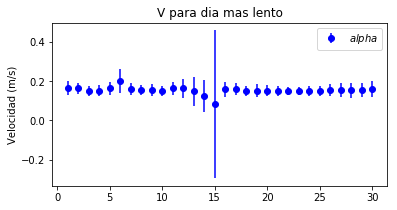

In [96]:
plt.figure(figsize=(6,3))
plt.errorbar(paramAl[:,0],paramAl[:,1],paramAl[:,2],linestyle='None', marker='o',label="$alpha$", color="b")
plt.ylabel('Velocidad (m/s)')
plt.title("V para dia mas lento")
plt.legend()

In [37]:
print(np.mean(alpha))
print(np.std(alpha))

0.1523247433785716
0.07977466720255783


In [38]:
paramAl

array([[1.00000000e+00, 1.63418723e-01, 3.64748637e-02],
       [2.00000000e+00, 1.62514012e-01, 2.93259531e-02],
       [3.00000000e+00, 1.50786376e-01, 2.60950299e-02],
       [4.00000000e+00, 1.50554461e-01, 2.69298365e-02],
       [5.00000000e+00, 1.62040991e-01, 3.36707706e-02],
       [6.00000000e+00, 1.99255911e-01, 6.18271420e-02],
       [7.00000000e+00, 1.57516678e-01, 3.04578723e-02],
       [8.00000000e+00, 1.52807631e-01, 2.51280468e-02],
       [9.00000000e+00, 1.52991371e-01, 2.93777350e-02],
       [1.00000000e+01, 1.49791136e-01, 2.35225751e-02],
       [1.10000000e+01, 1.62529779e-01, 3.27657493e-02],
       [1.20000000e+01, 1.62396412e-01, 4.86832008e-02],
       [1.30000000e+01, 1.47167830e-01, 7.55800721e-02],
       [1.40000000e+01, 1.24086913e-01, 8.23595942e-02],
       [1.50000000e+01, 8.16407234e-02, 3.77746455e-01],
       [1.60000000e+01, 1.57217087e-01, 3.69668931e-02],
       [1.70000000e+01, 1.58297799e-01, 3.15678760e-02],
       [1.80000000e+01, 1.49018

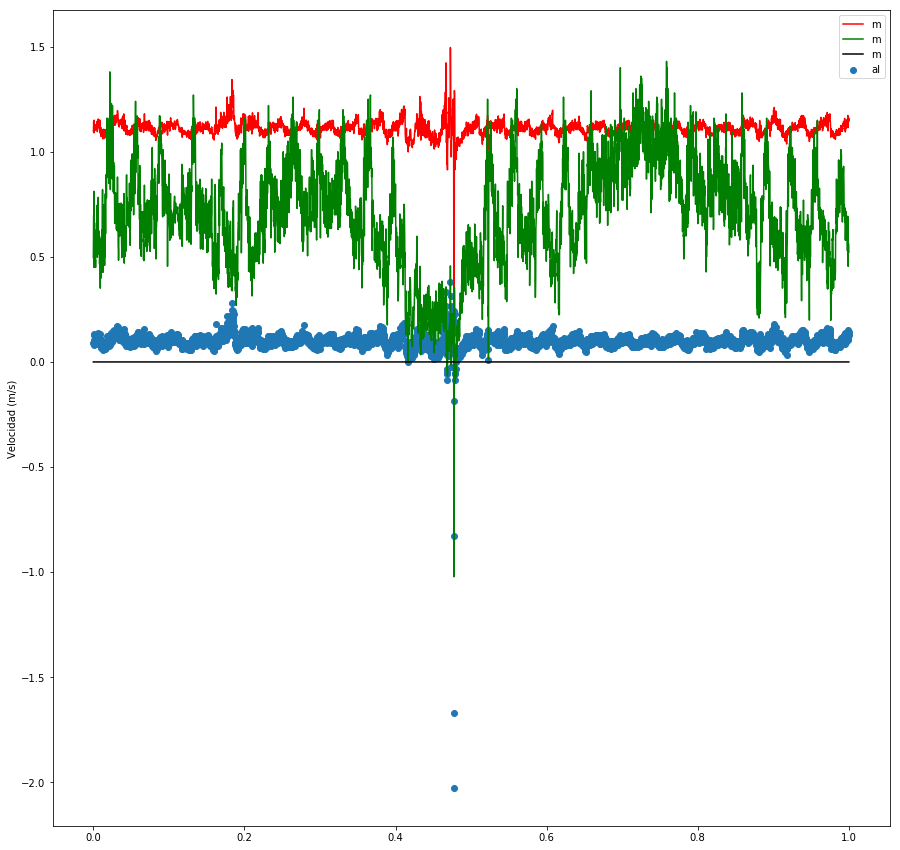

In [98]:
plt.figure(figsize=(15,15))
plt.scatter(np.linspace(0,1,4349), dataAl[:,8]/(np.mean(dataAl[:,8])*10), label='al')
plt.plot(np.linspace(0,1,4349), data[:,5]/data[:,6], label='m',color="red")
plt.plot(np.linspace(0,1,4349), data[:,5]-data[:,6], label='m',color="green")
plt.plot(np.linspace(0,1,4349), np.zeros(4349), label='m',color="k")
plt.ylabel('Velocidad (m/s)')
plt.legend()

In [131]:
diaMax=paramDia[paramDia[:,1]==np.max(paramDia[:,1])]
diaMin=paramDia[paramDia[:,1]==np.min(paramDia[:,1])]
dMax=dataAl[dataAl[:,2]==diaMax[0,0]]
dMin=dataAl[dataAl[:,2]==diaMin[0,0]]
dMed=dataAl[dataAl[:,2]==1]
tMax=dMax[:,3]*60+dMax[:,4]
tMin=dMin[:,3]*60+dMin[:,4]
tMed=dMed[:,3]*60+dMed[:,4]

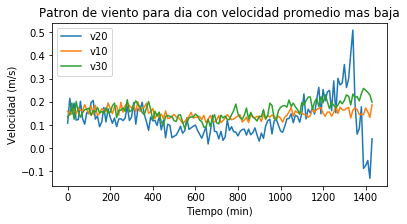

In [132]:
plt.figure(figsize=(6,3))
plt.plot(tMin, dMin[:,8], label='v20')
plt.plot(tMax, dMax[:,8], label='v10')
plt.plot(tMed, dMed[:,8], label='v30')
plt.ylabel('Velocidad (m/s)')
plt.xlabel('Tiempo (min)')
plt.title("Patron de viento para dia con velocidad promedio mas baja")
plt.legend()

Text(0, 0.5, 'Frecuencia')

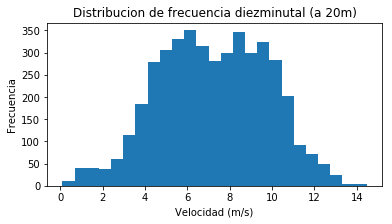

In [117]:
plt.figure(figsize=(6,3))
n,bins,patches=plt.hist(data[:,5],bins=25)
plt.title('Distribucion de frecuencia diezminutal (a 20m)')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia')

In [126]:
np.shape(n)

(25,)

Text(0, 0.5, 'Frecuencia')

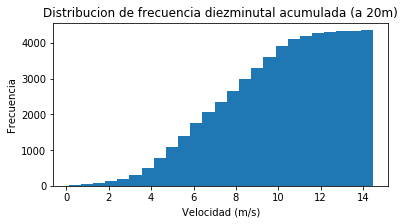

In [100]:
plt.figure(figsize=(6,3))
plt.hist(data[:,5],bins=25,cumulative=True)
plt.title('Distribucion de frecuencia diezminutal acumulada (a 20m)')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia')

In [88]:
rho=1.2
pesp=0.5*rho*np.mean(np.power(data[:,5],3))

In [89]:
pesp

309.464060988355

In [90]:
ke=np.mean(np.power(data[:,5],3))/np.power(np.mean(data[:,5]),3)

In [91]:
ke

1.3743537988290389

In [92]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm

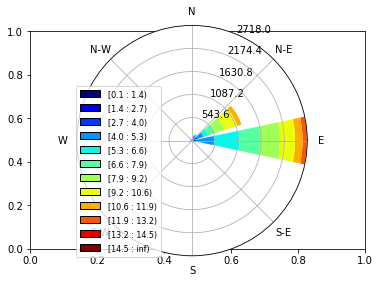

<Figure size 5760x5760 with 0 Axes>

In [116]:
fig,ax2 = plt.subplots(1,1)
plt.figure(figsize=(80,80))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(data[:,7],data[:,5],nsector=12,bins=12)
ax.set_legend()
fig.savefig("test_rasterization.pdf")